### Importing Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

### Reading and Displaying Grayscale Image

In [2]:
%matplotlib inline

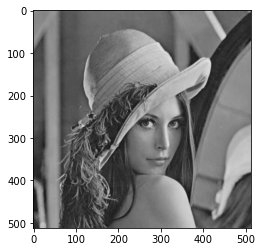

In [3]:
img = mpimg.imread('lena_gray.jpg')
plt.imshow(img, cmap= 'gray', vmin =0 , vmax=255)

### Initializing Average Filter for Image Blurring

In [4]:
averaging_filter = (1/9) * np.ones(shape=(3,3))
print(averaging_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


### Padding the Image with 1s on both Rows and Columns
To include all the pixels of our image, we pad our image with 1s in all dimensions and as a result our image dimension will increase from 512x512 to 514x514

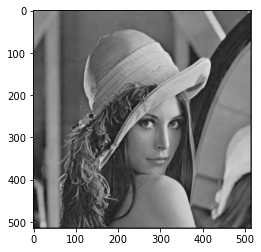

In [5]:
paded_img = np.pad(img,(1, 1), mode='constant', constant_values=1)
plt.imshow(paded_img, cmap= 'gray', vmin =0 , vmax=255)

### Function to Multiply Two matrices and sum the resultant matrix - Convolution Operation
This function will make our blur filter/kernel traverse our the extracted Image region and calculates the convolution values

In [6]:
def convolve_matrices(matA,matB):
    result = 0
    #Checking if Both matrices are of same shape/Dimension
    if len(matA) != len(matB):
        raise Exception('Matrices are not of Same Dimensions')
    #Iterating to find the computed value after convolution
    for i in range(len(matA)):
        for j in range(len(matA)):
                result += matA[i][j] * matB[i][j]
    return result

### Function to Convolve Image with average filter over all Rows and Columns
This function traverse the whole image and extracts regions to apply convolutions on it

In [7]:
def convolve_image(img,kernel):
    for i in range(img.shape[0]-2):
        for j in range(img.shape[1]-2):
            #Extracting the Original Image region on which we will apply convolution
            image_region = img[i:i+3,j:j+3]
            #Convolving Extracted image region and blur filter
            val = convolve_matrices(image_region,averaging_filter)
            #Replacing the pixel value at i,j with the computed value
            img[i][j] = val
    return img

### Applying Convolution on Image and Displaying its Output

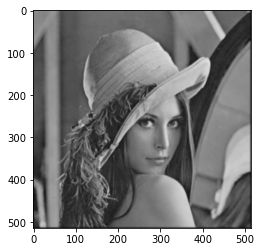

In [8]:
blurred_image = convolve_image(paded_img,averaging_filter)
#Displaying Output Image after only 1 Iteration of Convolution
plt.imshow(blurred_image, cmap= 'gray', vmin =0 , vmax=255)

### Applying Blurring filter multiple times and Plotting against original Image

In [9]:
#Number of iteration for Convolution
blur_count = 20

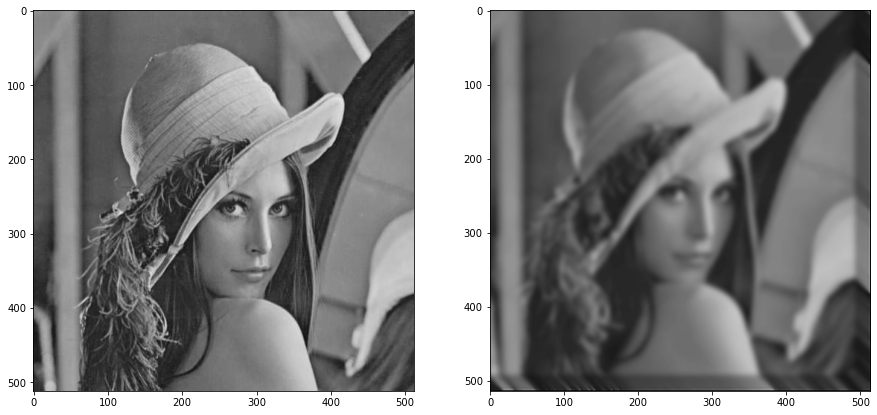

In [10]:
#Creating a Figure with 2 subplot
figure,axes = plt.subplots(1,2,figsize=(15,15))
#Showing the Original Image at the index 0
axes[0].imshow(img, cmap= 'gray', vmin =0 , vmax=255)
for i in range(1,blur_count):
    blurred_image = convolve_image(blurred_image,averaging_filter)
#Showing the Blurred Image after Convolution at the index 1
axes[1].imshow(blurred_image, cmap= 'gray', vmin =0 , vmax=255)